In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [8]:
df=pd.read_csv('HousingData.csv')

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [13]:
print(df.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [14]:
df.rename(columns={'MEDV': 'Price'}, inplace=True)


In [15]:
cols = [col for col in df.columns if col != 'Price']  # Get all columns except 'Price'
cols.append('Price')  # Add 'Price' at the end
df = df[cols]  # Reorder DataFrame


In [16]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [18]:
## CHhecking for missing values
import seaborn as sns

<AxesSubplot:>

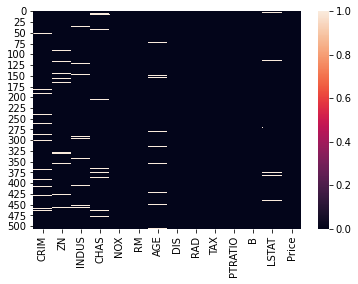

In [19]:
sns.heatmap(df.isnull())

In [21]:
df.isnull().sum()


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
Price       0
dtype: int64

In [37]:
##So, I'd try to fill up the missing values with the mean of some other columns
df['CRIM'].fillna(df['NOX'].mean(), inplace=True)
df['ZN'].fillna(df['PTRATIO'].mean(), inplace=True)
df['INDUS'].fillna(df['DIS'].mean(), inplace=True)
df['AGE'].fillna(df['PTRATIO'].mean(), inplace=True)
df['LSTAT'].fillna(df['DIS'].mean(), inplace=True)
df['CHAS'].fillna(df['NOX'].mean(), inplace=True)

In [38]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,3.795043,36.2


<AxesSubplot:>

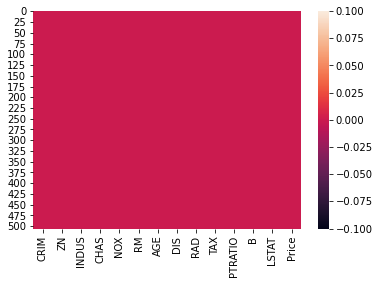

In [39]:
sns.heatmap(df.isnull())

In [40]:
## Now lets perform exploratory data analysis

In [42]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.185136,0.388161,-0.040640,0.411015,-0.219685,0.339925,-0.366157,0.602052,0.561144,0.277621,-0.365855,0.423679,-0.383611
ZN,-0.185136,1.000000,-0.504888,-0.046083,-0.502242,0.317779,-0.503790,0.639171,-0.308892,-0.309406,-0.406624,0.164879,-0.385952,0.366543
INDUS,0.388161,-0.504888,1.000000,0.078880,0.714746,-0.356945,0.537958,-0.682132,0.580495,0.704526,0.380912,-0.349611,0.528287,-0.458662
CHAS,-0.040640,-0.046083,0.078880,1.000000,0.083547,0.065399,0.072966,-0.080739,0.032246,-0.000979,-0.100284,0.042752,-0.029060,0.140823
NOX,0.411015,-0.502242,0.714746,0.083547,1.000000,-0.302188,0.660978,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.562456,-0.427321
RM,-0.219685,0.317779,-0.356945,0.065399,-0.302188,1.000000,-0.235461,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.596986,0.695360
AGE,0.339925,-0.503790,0.537958,0.072966,0.660978,-0.235461,1.000000,-0.675292,0.436062,0.479128,0.250052,-0.231642,0.539298,-0.369598
DIS,-0.366157,0.639171,-0.682132,-0.080739,-0.769230,0.205246,-0.675292,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.470038,0.249929
RAD,0.602052,-0.308892,0.580495,0.032246,0.611441,-0.209847,0.436062,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.452127,-0.381626
TAX,0.561144,-0.309406,0.704526,-0.000979,0.668023,-0.292048,0.479128,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.508745,-0.468536


In [43]:
## Let's try to analyze the correlation by constructing important plots
## we're trying to check for multicollinearity(relationship between 2 independent var)

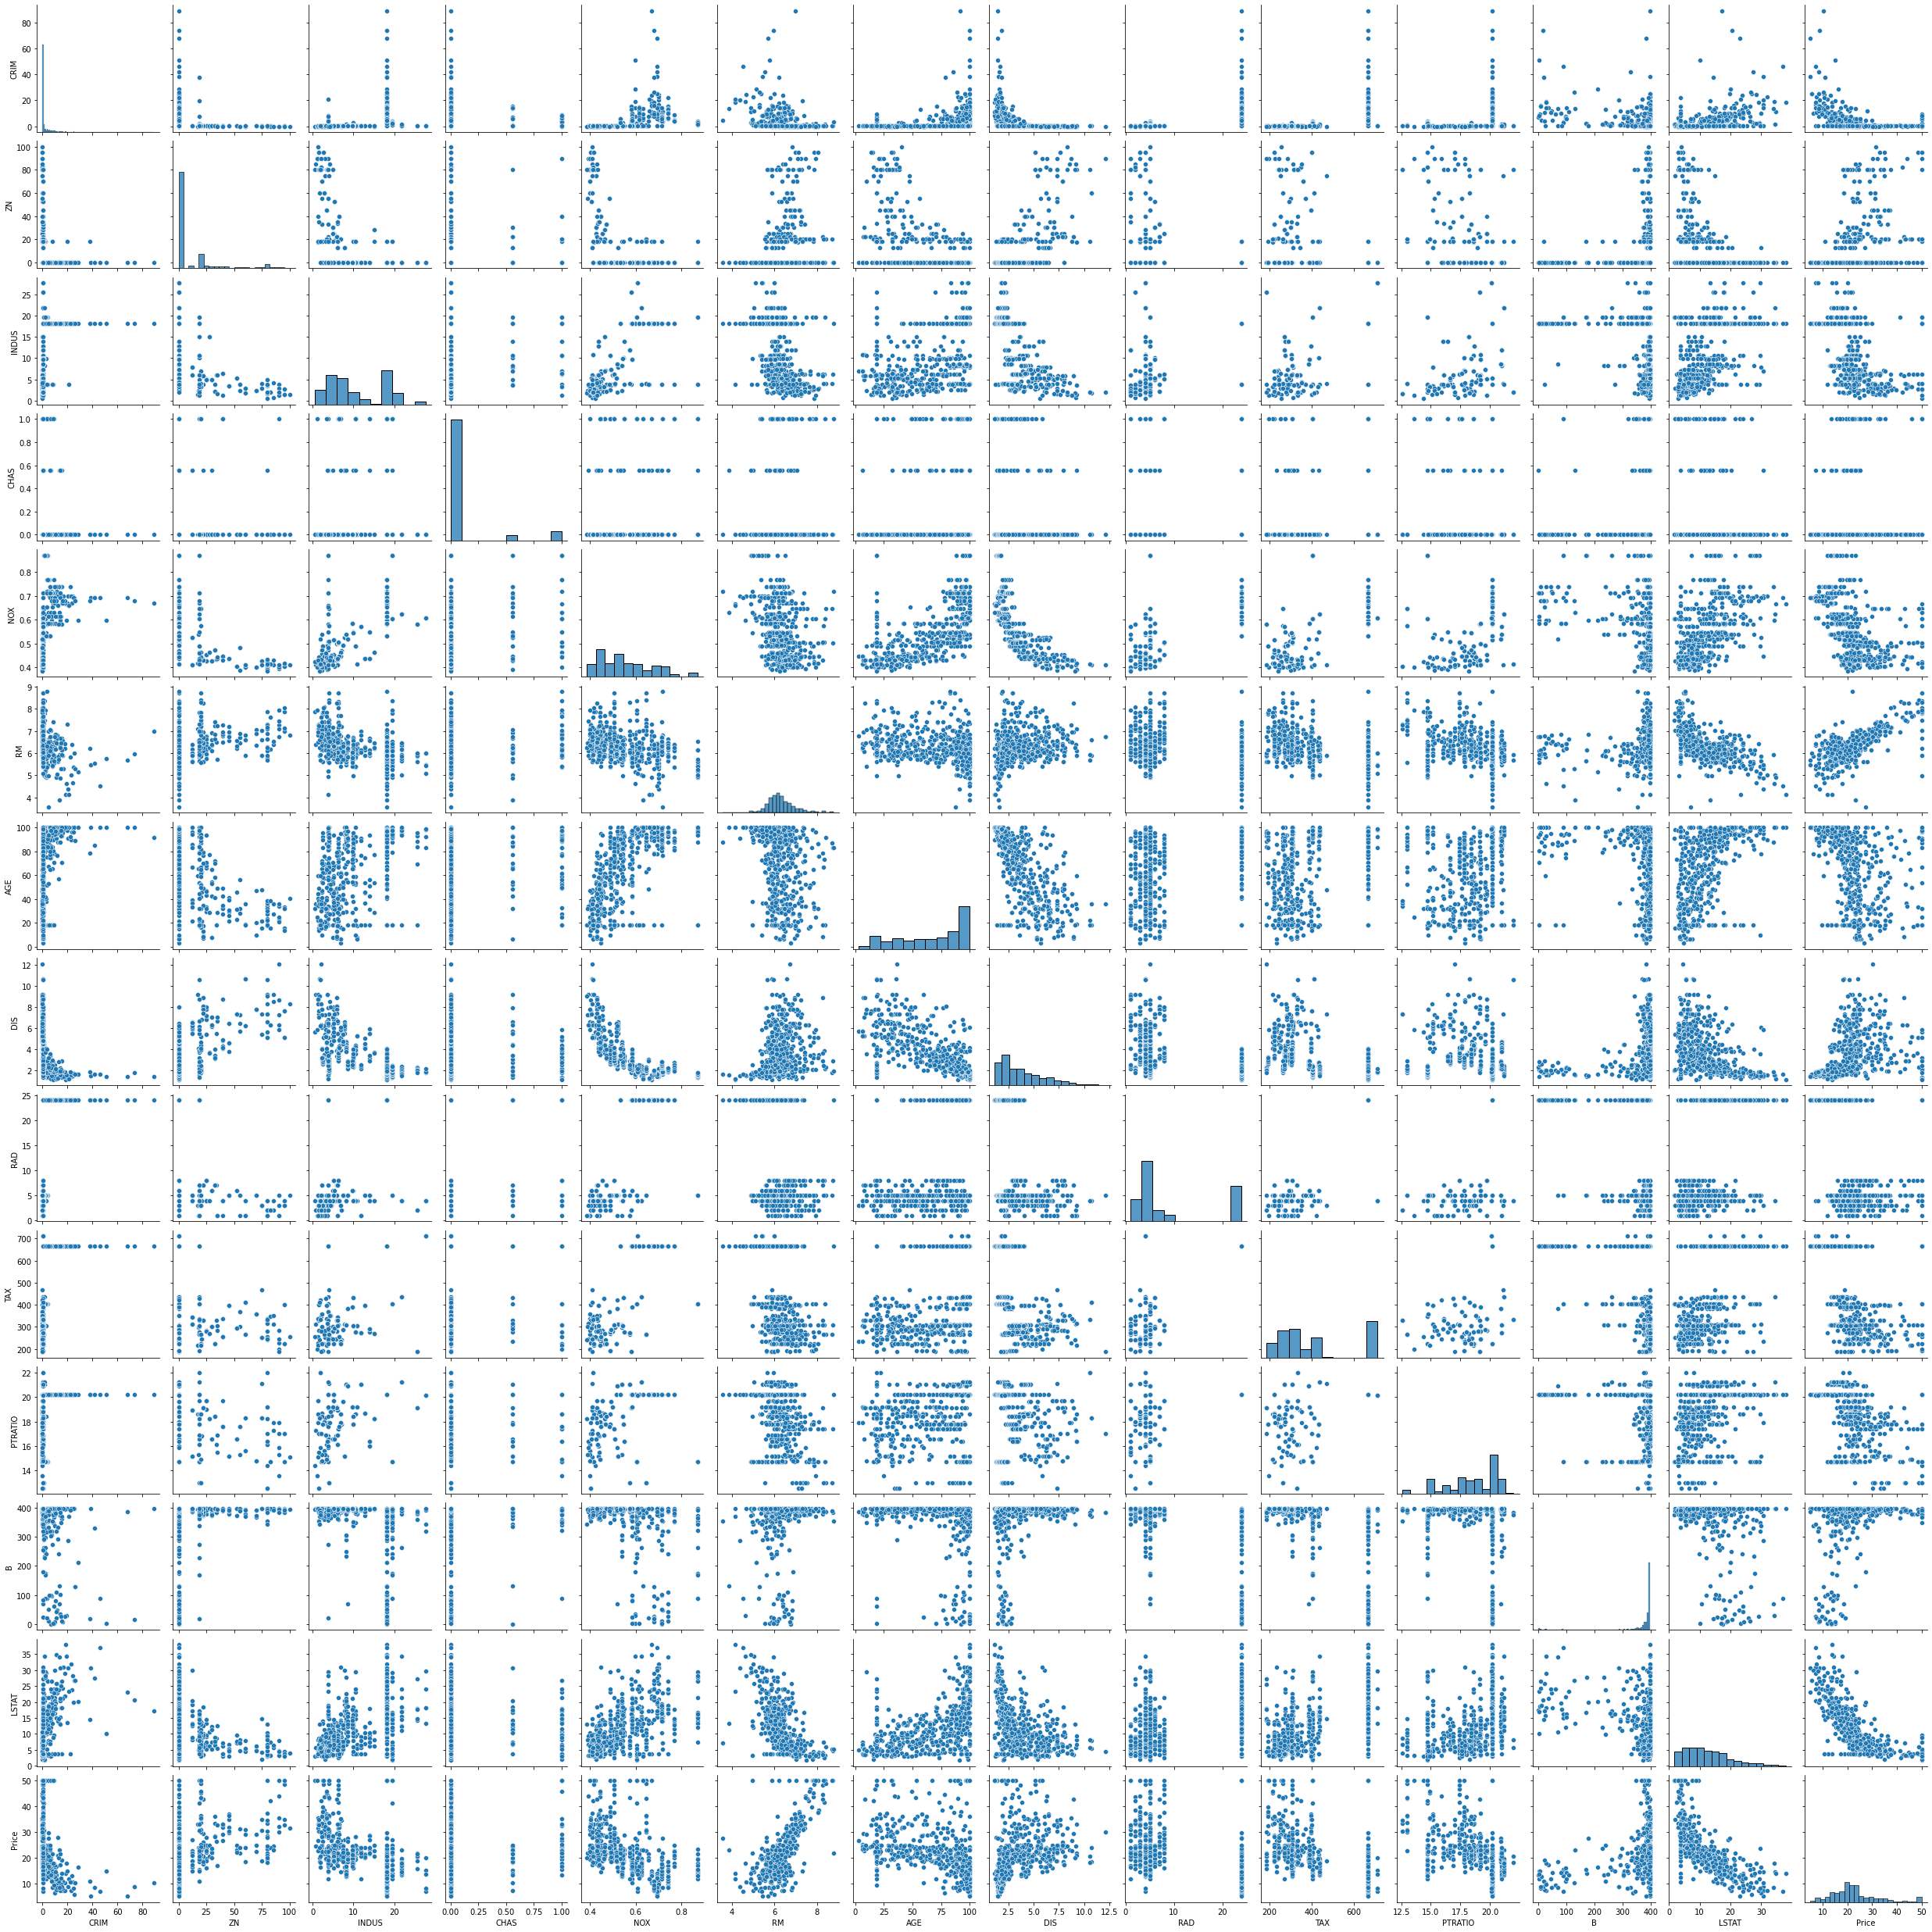

In [44]:
sns.pairplot(df)

In [45]:
#this isnt adviceable as I'm workinh with a large dataset

Text(0, 0.5, 'Price')

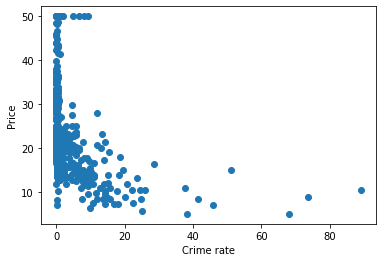

In [47]:
plt.scatter(df['CRIM'], df['Price'])
plt.xlabel('Crime rate')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

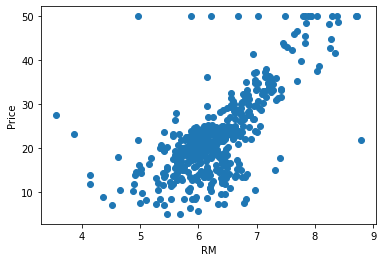

In [48]:
plt.scatter(df['RM'], df['Price'])
plt.xlabel('RM')
plt.ylabel('Price')

<AxesSubplot:xlabel='RM', ylabel='Price'>

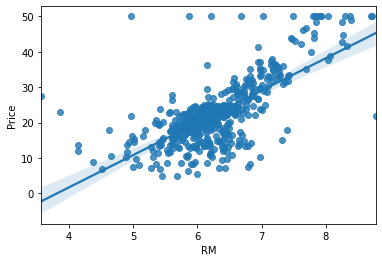

In [49]:
#Lets now plot a regression plot-now I'd use seaborn
sns.regplot(x='RM', y='Price', data=df)
## my graph shows a positive corellation

<AxesSubplot:xlabel='LSTAT', ylabel='Price'>

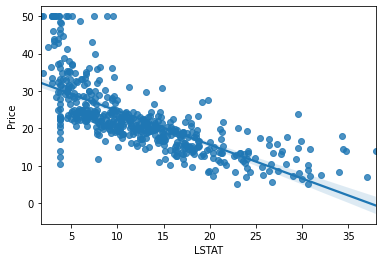

In [50]:
sns.regplot(x='LSTAT', y='Price', data=df)

In [51]:
#This clearly shows me a negative corellation

<AxesSubplot:xlabel='CHAS', ylabel='Price'>

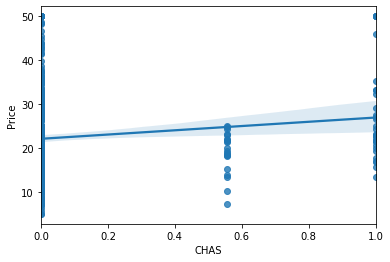

In [52]:
sns.regplot(x='CHAS', y='Price', data=df)

<AxesSubplot:xlabel='PTRATIO', ylabel='Price'>

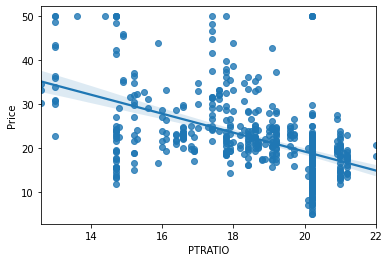

In [53]:
sns.regplot(x='PTRATIO', y='Price', data=df)

In [91]:
#Now let's create our model then define our dependent and independent variable
X=df.iloc[:,:-1]
y=df.Price

In [92]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,3.795043


In [93]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
X_test


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,3.795043,0.0,0.510,6.416,18.455534,2.6463,5,296,16.6,395.50,9.04
274,0.05644,40.0,6.410000,1.0,0.447,6.758,32.900000,4.0776,4,254,17.6,396.90,3.53
491,0.10574,0.0,27.740000,0.0,0.609,5.983,98.800000,1.8681,4,711,20.1,390.11,18.07
72,0.09164,0.0,10.810000,0.0,0.413,6.065,7.800000,5.2873,4,305,19.2,390.91,5.52
452,5.09017,0.0,18.100000,0.0,0.713,6.297,91.800000,2.3682,24,666,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.100000,0.0,0.597,4.628,100.000000,1.5539,24,666,20.2,28.79,34.37
436,14.42080,0.0,18.100000,0.0,0.740,6.461,93.300000,2.0026,24,666,20.2,27.49,18.05
411,14.05070,0.0,18.100000,0.0,0.597,6.657,100.000000,1.5275,24,666,20.2,35.05,21.22
86,0.05188,0.0,4.490000,0.0,0.449,6.015,45.100000,4.4272,3,247,18.5,395.99,12.86


In [96]:
#standardizing the dataset-- this helps make sure that each and every feature contributes to the model by ensuring unifrom unit

In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [98]:

X_train = scaler.fit_transform(X_train) 

In [99]:
X_test=scaler.transform(X_test)

In [100]:
X_train

array([[ 1.3103038 , -0.51455076,  1.09950863, ...,  0.84534281,
        -0.07433689,  1.7842839 ],
       [-0.32181939, -0.51455076, -0.35363247, ...,  1.20474139,
         0.4301838 , -0.51588621],
       [-0.38901915,  0.29029815, -0.65709969, ..., -0.63717631,
         0.06529747, -0.60543054],
       ...,
       [-0.39124693,  2.97426263, -1.24798538, ..., -0.59225149,
         0.37901005, -0.86287051],
       [ 0.87234273, -0.51455076,  1.09950863, ...,  0.84534281,
        -2.69458597,  1.55482654],
       [-0.36701339, -0.51455076, -0.29235544, ...,  1.15981657,
        -3.12158061, -0.21367408]])

In [101]:
X_test

array([[-0.38254326, -0.51455076, -0.98755175, ..., -0.77195078,
         0.42887165, -0.43613578],
       [-0.38654988,  1.22985593, -0.60603549, ..., -0.32270256,
         0.44418004, -1.20705654],
       [-0.38096057, -0.51455076,  2.50596247, ...,  0.80041799,
         0.36993437,  0.82727882],
       ...,
       [ 1.20002559, -0.51455076,  1.09950863, ...,  0.84534281,
        -3.5124912 ,  1.26800485],
       [-0.38706686, -0.51455076, -0.88615908, ...,  0.08162084,
         0.43422959,  0.09833197],
       [-0.3821646 , -0.51455076,  0.33062775, ...,  0.17147048,
         0.29470458, -0.45012709]])

In [114]:
#Model Training
from sklearn.linear_model import LinearRegression

In [115]:
regression_model=LinearRegression()
regression_model.fit(X_train, y_train)


LinearRegression()

In [122]:
#prediction with test data
y_pred=regression_model.predict(X_test)
y_pred

array([30.26621354, 35.56876935, 14.19788405, 24.77135554, 18.2025249 ,
       22.73530887, 19.23163586, 14.70406509, 21.69755176, 20.66712328,
       24.26686015, 19.76089025, -5.63236091, 21.49176298, 18.70887296,
       28.79520253, 19.67017883,  7.24860735, 41.04450732, 16.96835753,
       28.5613593 , 30.21401753, 11.72755024, 26.45366883, 17.00130301,
       14.7589781 , 24.51372251, 14.27264888, 22.43653289, 19.21265586,
       22.3682974 , 24.9082324 , 25.90574337, 16.03338241, 16.2833094 ,
       16.4798256 , 30.78179526, 19.98942942, 23.45575052, 26.20148657,
       14.48237287, 32.23653616, 43.18156018, 17.3967922 , 27.3950392 ,
       16.09966647, 14.04689215, 25.93671832, 19.47506114, 29.84905468,
       20.75144111, 34.72478797, 16.28427117, 26.0397819 , 39.70749758,
       21.65912224, 19.4652386 , 32.72152835, 25.2006326 , 14.14774251,
       22.54850111, 30.69144283, 31.50693622, 16.03880704, 19.90385442,
       16.33221734, 19.93373089, 25.9364099 , 30.84690813, 11.11

In [117]:
print(regression_model.coef_)

[-1.03241174  0.72612109 -0.16881896  0.6611593  -1.88641612  3.44899577
 -0.65302943 -3.31256368  1.93057087 -1.61864923 -2.01968749  1.12981905
 -2.89936152]


In [118]:
print(regression_model.intercept_)

22.796534653465347


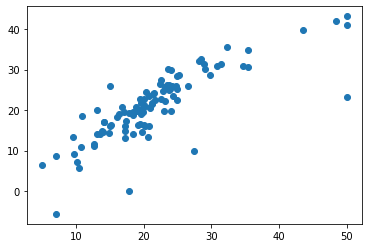

In [123]:
#let's plot a scattered plot for the regression to check how accurate our model is 
plt.scatter(y_test, y_pred)

In [141]:
#I can also use model evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
MAE=mean_absolute_error(y_test, y_pred)

In [142]:
MAE

3.1730412376597203

In [148]:
MSE=mean_squared_error(y_test, y_pred)
MSE

25.360441488463465

In [150]:
#to evaluate root mean square error
print(np.sqrt(mean_squared_error(y_test, y_pred)))

5.035915158981878


In [126]:
# Mean abosolute error is a metrics that is use to measure how far the model predictions are from the actual value
#a lower MAE is better

In [127]:
error=y_test-y_pred

In [128]:
error

173    -6.666214
274    -3.168769
491    -0.597884
72     -1.971356
452    -2.102525
         ...    
412    17.822368
436    -3.676270
411     1.236153
86     -0.168027
75     -2.682585
Name: Price, Length: 102, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

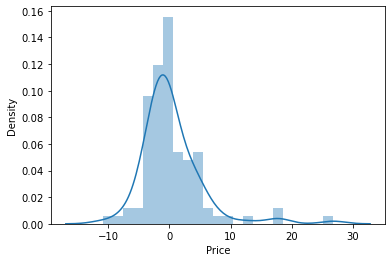

In [135]:
sns.distplot(error)

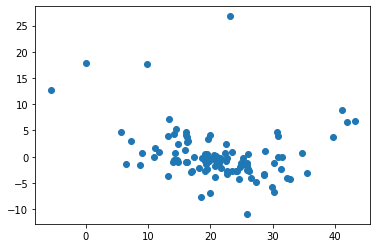

In [131]:
#scatter plot with respect to predictions and error
plt.scatter(y_pred, error)

## New data Prediction

In [179]:
# Extract and reshape the first row, ensuring 'Price' is dropped
first_row = df.drop(columns=['Price']).iloc[0].values.reshape(1, -1)  

# Transform the first row using the same scaler that was used during training
first_row_scaled = scaler.transform(first_row)

# Make the prediction
prediction = regression_model.predict(first_row_scaled)

# Print the predicted value
print(prediction)


[29.84905468]


In [180]:
import pickle

In [181]:
pickle.dump(regression_model, open('regmodel.pkl','wb'))

In [182]:
pickled_model=pickle.load(open('regmodel.pkl', 'rb'))

In [187]:
prediction = np.array(prediction).reshape(1, -1)
print(prediction)# Ensures correct shape


[[29.84905468]]


In [188]:
test_row = df.drop(columns=['Price']).iloc[0].values.reshape(1, -1)  # Extract first row properly
print(test_row.shape)  # Should be (1, 13)


(1, 13)


In [189]:
result = pickled_model.predict(test_row)
print(result)
 

[-73.09788757]
